# Model Testing and Results

## Import Libraries

In [1]:
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
%matplotlib inline

import os
import math

import numpy as np
import random
from scipy.cluster.vq import vq
from scipy import spatial

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

from xgboost import XGBClassifier

import tensorflow as tf

2022-12-03 17:01:44.200900: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Create final dataframe and confidence interval splits

In [2]:
df = pd.read_csv("combined_df.csv", index_col=0)
df1 = pd.read_csv("combined_df.csv", index_col=0)
df2 = pd.read_csv("combined_df.csv", index_col=0)
df3 = pd.read_csv("combined_df.csv", index_col=0)

### Confidence Interval .2 - .5

In [3]:
df1 = df1[pd.to_numeric(df.confidence_x) <= 0.5]
df1 = df1[pd.to_numeric(df.confidence_x) > 0.2]
df1 = df1[pd.to_numeric(df.confidence_y) <= 0.5]
df1 = df1[pd.to_numeric(df.confidence_y) > 0.2]
df1.describe()

/tmp/ipykernel_101/2170641453.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[pd.to_numeric(df.confidence_x) > 0.2]
/tmp/ipykernel_101/2170641453.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[pd.to_numeric(df.confidence_y) <= 0.5]
/tmp/ipykernel_101/2170641453.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[pd.to_numeric(df.confidence_y) > 0.2]


,potential_bolide_id,potential_bolide_longitude,potential_bolide_latitude,confidence_x,confidence_y,_id,yaw_flip_flag,maxEnergy,totEnergy,nGroups,duration,latLonLinelets,energyRatio,splinelets,groundTrackDeviation,chop,glint,neighborhood,latLonLinearity,medianAlt_g16,medianSpeed_g16,medianResDist_g16,medianAlt_g17,medianSpeed_g17,medianResDist_g17,phase,moon_fullness,solarhour,sun_alt_obs,sun_alt_app,csm_1,csm_2,csm_1_17,csm_2_17,csm_2_16,csm_1_16,medianAlt,medianSpeed,medianResDist
count,4.477000e+03,4477.000000,4477.000000,4477.000000,4477.000000,4.477000e+03,4477.000000,4.477000e+03,4.477000e+03,4477.000000,4477.000000,4.477000e+03,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,1026.000000,985.000000,1026.000000,1026.000000,985.000000,1026.000000,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,3293.000000,3304.000000,2411.000000,2535.000000,2841.000000,2736.000000,1026.000000,985.000000,1026.000000
mean,1.669435e+18,-79.886358,4.329849,0.299213,0.299213,1.669435e+18,0.580299,1.463815e+01,1.375986e+03,84.751173,0.280462,1.107191e+01,0.503453,0.003298,1.258811,0.012346,4961.440940,4.400214,0.777775,22.995812,101.249212,9.423460,22.996044,106.435703,9.423460,0.494654,0.505924,11.464625,18.230516,18.182451,0.798905,0.755623,0.814658,0.775101,0.738381,0.781420,22.995928,103.842457,9.423460
std,4.999762e+16,81.470076,24.323229,0.079820,0.079820,4.999762e+16,0.907764,9.794443e+02,9.206777e+04,234.181508,0.606194,7.302864e+02,0.225194,0.004543,51.866383,0.022168,3366.557819,140.553884,0.242207,23.116122,349.500807,28.436469,23.116019,356.925530,28.436469,0.286890,0.291842,5.781894,43.358574,43.369982,0.239205,0.228884,0.246868,0.236428,0.247952,0.253969,23.116069,297.971115,28.436469
min,1.620192e+18,-179.909973,-56.537132,0.200069,0.200069,1.620192e+18,0.000000,1.285030e-15,2.218620e-14,20.000000,0.022126,4.827563e-13,0.000000,0.000000,0.000432,0.000000,4.593179,0.000000,0.037685,9.167527,0.056485,0.012698,9.173078,0.000000,0.012698,0.000019,0.000037,0.001867,-88.277067,-88.277067,0.000000,0.001438,0.000000,0.000000,0.000000,0.000000,9.170303,0.061906,0.012698
25%,1.620210e+18,-125.945000,-13.878130,0.232000,0.232000,1.620210e+18,0.000000,5.884478e-15,1.466787e-13,23.000000,0.075531,1.042661e-10,0.365322,0.000902,0.006025,0.000000,2700.034869,0.000000,0.615768,13.171033,0.739195,3.322633,13.169876,1.123477,3.322633,0.248555,0.258401,7.474807,-16.050386,-16.050386,0.672300,0.621161,0.718833,0.645240,0.581686,0.650021,13.170454,14.487498,3.322633
50%,1.620222e+18,-93.573151,7.184605,0.278000,0.278000,1.620222e+18,0.000000,1.258367e-14,3.082459e-13,32.000000,0.135424,3.465727e-10,0.509771,0.002023,0.008929,0.000000,4515.243650,0.000000,0.869599,14.948089,24.961335,6.821102,14.944873,45.863704,6.821102,0.481736,0.503360,11.222820,26.310449,26.278391,0.896462,0.822287,0.930373,0.853366,0.811860,0.880644,14.944426,50.182204,6.821102
75%,1.720202e+18,-60.312120,21.303482,0.351262,0.351262,1.720202e+18,2.000000,3.048152e-14,7.120885e-13,57.000000,0.268177,1.205023e-09,0.634286,0.004136,0.022145,0.023256,6630.539346,0.055556,0.994542,15.861903,99.511546,11.559537,15.863039,117.961140,11.559537,0.743563,0.762404,15.179269,53.918446,53.906892,0.991746,0.946802,0.998652,0.973258,0.948731,0.991542,15.862471,96.327186,11.559537
max,1.720222e+18,179.988892,56.449947,0.500000,0.500000,1.720222e+18,2.000000,6.553500e+04,6.160290e+06,6799.000000,14.052796,4.886167e+04,1.000000,0.077194,3308.090866,0.243902,20015.086796,9260.136364,0.999999,101.017106,7758.017464,794.490545,101.021421,8979.397522,794.490545,0.999970,0.999913,23.997470,89.502041,89.501931,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,101.019264,6501.974879,794.490545


### Confidence Interval .5 - .7

In [4]:
df2 = df2[pd.to_numeric(df.confidence_x) <= 0.7]
df2 = df2[pd.to_numeric(df.confidence_x) > 0.5]
df2 = df2[pd.to_numeric(df.confidence_y) <= 0.7]
df2 = df2[pd.to_numeric(df.confidence_y) > 0.5]
df2.describe()

/tmp/ipykernel_101/2901104509.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[pd.to_numeric(df.confidence_x) > 0.5]
/tmp/ipykernel_101/2901104509.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[pd.to_numeric(df.confidence_y) <= 0.7]
/tmp/ipykernel_101/2901104509.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[pd.to_numeric(df.confidence_y) > 0.5]


,potential_bolide_id,potential_bolide_longitude,potential_bolide_latitude,confidence_x,confidence_y,_id,yaw_flip_flag,maxEnergy,totEnergy,nGroups,duration,latLonLinelets,energyRatio,splinelets,groundTrackDeviation,chop,glint,neighborhood,latLonLinearity,medianAlt_g16,medianSpeed_g16,medianResDist_g16,medianAlt_g17,medianSpeed_g17,medianResDist_g17,phase,moon_fullness,solarhour,sun_alt_obs,sun_alt_app,csm_1,csm_2,csm_1_17,csm_2_17,csm_2_16,csm_1_16,medianAlt,medianSpeed,medianResDist
count,9.770000e+02,977.000000,977.000000,977.000000,977.000000,9.770000e+02,977.000000,9.770000e+02,9.770000e+02,977.000000,977.000000,9.770000e+02,977.000000,9.770000e+02,977.000000,977.000000,977.000000,977.000000,977.000000,276.000000,271.000000,276.000000,276.000000,271.000000,276.000000,977.000000,977.000000,977.000000,977.000000,977.000000,788.000000,789.000000,577.000000,601.000000,684.000000,660.000000,276.000000,271.000000,276.000000
mean,1.668415e+18,-91.892343,4.273079,0.608072,0.608072,1.668415e+18,0.530194,2.515300e-14,2.296525e-12,66.135107,0.198418,1.645112e+00,0.519795,3.157078e-03,0.308432,0.011460,5298.455511,1.096597,0.736594,57.062265,73.993144,4.826610,57.061775,76.067941,4.826610,0.499004,0.526410,9.142461,7.795903,7.738203,0.714248,0.700413,0.736812,0.723891,0.684025,0.698004,57.062020,75.030542,4.826610
std,4.999313e+16,59.876769,24.952178,0.058535,0.058535,4.999313e+16,0.883222,1.197160e-13,2.425727e-11,209.697568,0.480339,4.074845e+01,0.171215,3.194483e-03,1.423892,0.019934,3335.710700,5.505738,0.256722,31.967703,288.042871,4.849723,31.967441,333.338796,4.849723,0.274376,0.276796,5.704412,41.194120,41.196646,0.301413,0.264703,0.302116,0.276250,0.284101,0.319126,31.967572,301.582440,4.849723
min,1.620192e+18,-179.999374,-55.433178,0.501553,0.501553,1.620192e+18,0.000000,1.485006e-15,2.770036e-14,20.000000,0.037765,8.505842e-14,0.045044,1.278807e-32,0.000737,0.000000,4.664539,0.000000,0.013851,9.414614,0.148727,0.019786,9.404696,0.152915,0.019786,0.000434,0.000869,0.029380,-86.097212,-86.097212,0.000253,0.000413,0.000000,0.000825,0.000000,0.000000,9.409655,0.156065,0.019786
25%,1.620203e+18,-125.504967,-14.965714,0.554336,0.554336,1.620203e+18,0.000000,4.284670e-15,9.074463e-14,23.000000,0.051501,7.275899e-11,0.424244,1.155799e-03,0.004692,0.000000,3086.871086,0.000000,0.548165,15.971039,0.619480,1.745845,15.971352,0.636067,1.745845,0.261862,0.293936,5.167735,-24.238962,-24.238962,0.509982,0.526268,0.551202,0.541304,0.480331,0.476149,15.971196,0.723042,1.745845
50%,1.620222e+18,-99.241791,5.923063,0.614998,0.614998,1.620222e+18,0.000000,7.629850e-15,1.747938e-13,31.000000,0.091554,2.228768e-10,0.522931,2.393183e-03,0.007127,0.000000,4913.421170,0.000000,0.768810,75.254221,1.351342,3.345262,75.254805,2.049600,3.345262,0.498023,0.535565,7.904791,12.155257,12.083665,0.826069,0.760223,0.876136,0.814000,0.745893,0.816449,75.254513,13.011491,3.345262
75%,1.720203e+18,-64.014229,22.445083,0.660000,0.660000,1.720203e+18,2.000000,1.608325e-14,4.055920e-13,51.000000,0.183108,7.923609e-10,0.617984,4.235770e-03,0.011717,0.020833,6880.742747,0.000000,0.997625,83.678188,86.228349,6.094841,83.678851,82.921465,6.094841,0.726916,0.768021,11.902888,38.192843,38.172694,0.980167,0.932484,0.994286,0.966593,0.942848,0.986844,83.678519,88.435462,6.094841
max,1.720222e+18,179.733856,54.917812,0.700000,0.700000,1.720222e+18,2.000000,2.601573e-12,5.523402e-10,5626.000000,11.988250,1.210806e+03,1.000000,3.713958e-02,25.226799,0.142857,20015.086796,93.729730,1.000000,106.357673,4191.996365,43.742798,106.353817,5317.131013,43.742798,0.999557,0.997530,23.998081,87.833774,87.833180,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,106.355745,4754.563689,43.742798


### Confidence Interval greater than .7

In [5]:
df3 = df3[pd.to_numeric(df.confidence_x) > 0.7]
df3 = df3[pd.to_numeric(df.confidence_y) > 0.7]
df3.describe()

/tmp/ipykernel_101/3176171740.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df3[pd.to_numeric(df.confidence_y) > 0.7]


,potential_bolide_id,potential_bolide_longitude,potential_bolide_latitude,confidence_x,confidence_y,_id,yaw_flip_flag,maxEnergy,totEnergy,nGroups,duration,latLonLinelets,energyRatio,splinelets,groundTrackDeviation,chop,glint,neighborhood,latLonLinearity,medianAlt_g16,medianSpeed_g16,medianResDist_g16,medianAlt_g17,medianSpeed_g17,medianResDist_g17,phase,moon_fullness,solarhour,sun_alt_obs,sun_alt_app,csm_1,csm_2,csm_1_17,csm_2_17,csm_2_16,csm_1_16,medianAlt,medianSpeed,medianResDist
count,5.008000e+03,5008.000000,5008.000000,5008.000000,5008.000000,5.008000e+03,5008.000000,5.008000e+03,5.008000e+03,5008.000000,5008.000000,5.008000e+03,5008.000000,5.008000e+03,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,1909.000000,1899.000000,1909.000000,1909.000000,1899.000000,1909.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,4363.000000,4375.000000,3256.000000,3363.000000,3694.000000,3510.000000,1909.000000,1899.000000,1909.000000
mean,1.671665e+18,-92.714848,2.818525,0.920686,0.920686,1.671665e+18,0.612620,2.799022e-14,1.982752e-12,80.154553,0.193478,8.664879e-07,0.550828,1.370618e-03,0.595553,0.012034,6044.125152,0.203250,0.711461,77.084917,45.390917,3.544123,77.084024,46.179532,3.544123,0.480456,0.488211,7.366962,-2.375560,-2.454431,0.634604,0.641788,0.677734,0.681653,0.617213,0.608654,77.084470,45.785225,3.544123
std,4.998400e+16,67.262351,25.826093,0.084713,0.084713,4.998400e+16,0.922012,8.091939e-14,1.478745e-11,95.316339,0.240844,1.642071e-05,0.126255,1.812913e-03,1.653858,0.014439,2810.788390,1.541024,0.273163,18.042035,112.923635,35.989156,18.045363,101.205183,35.989156,0.292257,0.284962,5.006921,36.609872,36.598740,0.319118,0.281735,0.313467,0.283678,0.305172,0.341940,18.043686,100.948598,35.989156
min,1.620192e+18,-179.829575,-56.084396,0.700329,0.700329,1.620192e+18,0.000000,1.285030e-15,3.040003e-14,20.000000,0.037765,2.555835e-14,0.087107,7.776743e-07,0.000629,0.000000,19.866321,0.000000,0.005218,9.652346,0.065676,0.006051,9.658417,0.056455,0.006051,0.000354,0.000003,0.007717,-88.451701,-88.451701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.655382,0.061065,0.006051
25%,1.620204e+18,-131.131691,-17.505121,0.870000,0.870000,1.620204e+18,0.000000,5.784490e-15,1.519308e-13,32.000000,0.069428,6.281880e-11,0.479929,3.404956e-04,0.005727,0.000000,4022.555530,0.000000,0.495794,76.516262,0.594743,1.191164,76.516848,0.585563,1.191164,0.217820,0.228684,4.074882,-30.296487,-30.296487,0.371706,0.428851,0.423027,0.457874,0.364434,0.304576,76.515381,0.594695,1.191164
50%,1.720192e+18,-103.952076,3.125391,0.956092,0.956092,1.720192e+18,0.000000,1.068390e-14,3.347579e-13,50.000000,0.117113,1.687780e-10,0.548089,8.091738e-04,0.007958,0.007752,5794.751743,0.000000,0.731651,82.887033,1.952341,2.438583,82.887127,2.198962,2.438583,0.475982,0.485265,6.400811,-1.948505,-3.211300,0.697070,0.685471,0.768914,0.748319,0.664612,0.673796,82.887080,3.976587,2.438583
75%,1.720210e+18,-67.572543,23.902517,0.990000,0.990000,1.720210e+18,2.000000,2.308241e-14,9.410545e-13,90.000000,0.220873,4.935013e-10,0.629166,1.698630e-03,0.012939,0.020000,7675.302813,0.000000,0.998256,87.206415,74.322189,3.766567,87.204013,72.359438,3.766567,0.736354,0.728623,9.008958,25.306943,25.273419,0.945061,0.895556,0.978758,0.944323,0.903549,0.950835,87.205214,73.276714,3.766567
max,1.720222e+18,179.871216,55.481396,1.000000,1.000000,1.720222e+18,2.000000,2.159426e-12,8.648031e-10,1577.000000,3.519494,9.461542e-04,0.954660,2.841545e-02,24.563548,0.147059,20015.086796,63.965517,0.999991,108.444170,3860.275003,1572.705731,108.441648,2072.087261,1572.705731,0.999999,0.999689,23.996054,87.615317,87.614661,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,108.442909,2966.181132,1572.705731


## Replace NA values and create final CSM field

In [6]:
df[["medianAlt", "medianSpeed", "medianResDist", "csm_1", "csm_2"]] = df[["medianAlt", "medianSpeed", "medianResDist", "csm_1", "csm_2"]].fillna(-1)
df["csm"] = df["csm_2"].apply(lambda v: -1 if v == -1 else 0 if v < 0.25 else 1)
df.describe()

,potential_bolide_id,potential_bolide_longitude,potential_bolide_latitude,confidence_x,confidence_y,_id,yaw_flip_flag,maxEnergy,totEnergy,nGroups,duration,latLonLinelets,energyRatio,splinelets,groundTrackDeviation,chop,glint,neighborhood,latLonLinearity,medianAlt_g16,medianSpeed_g16,medianResDist_g16,medianAlt_g17,medianSpeed_g17,medianResDist_g17,phase,moon_fullness,solarhour,sun_alt_obs,sun_alt_app,csm_1,csm_2,csm_1_17,csm_2_17,csm_2_16,csm_1_16,medianAlt,medianSpeed,medianResDist,csm
count,1.046200e+04,10462.000000,10462.000000,10462.000000,10462.000000,1.046200e+04,10462.000000,1.046200e+04,1.046200e+04,10462.000000,10462.000000,1.046200e+04,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,3211.000000,3155.000000,3211.000000,3211.000000,3155.000000,3211.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,6244.000000,6499.000000,7219.000000,6906.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,1.670407e+18,-87.148347,3.601100,0.625546,0.625546,1.670407e+18,0.591092,6.264099e+00,5.888253e+02,80.812369,0.231162,4.891630e+00,0.527657,0.002362,0.852568,0.012114,5511.177680,2.082681,0.742186,58.080970,65.286836,5.532964,58.080471,67.558957,5.532964,0.488264,0.499358,9.286280,7.392259,7.328547,0.377022,0.369244,0.736064,0.722009,0.671229,0.685639,17.133071,19.332560,1.005099,0.550946
std,5.000122e+16,73.344535,25.120392,0.306245,0.306245,5.000122e+16,0.912619,6.407166e+02,6.022736e+04,178.726562,0.456445,4.778883e+02,0.180490,0.003501,33.950905,0.018633,3152.547260,91.983063,0.260694,32.557276,231.374621,32.207530,32.557939,237.012072,32.207530,0.288409,0.287409,5.756323,41.233293,41.237418,0.724817,0.706302,0.295533,0.269117,0.287680,0.318352,32.677854,117.118216,18.093840,0.792877
min,1.620192e+18,-179.999374,-56.537132,0.200069,0.200069,1.620192e+18,0.000000,1.285030e-15,2.218620e-14,20.000000,0.022126,2.555835e-14,0.000000,0.000000,0.000432,0.000000,4.593179,0.000000,0.005218,9.167527,0.056485,0.006051,9.173078,0.000000,0.006051,0.000019,0.000003,0.001867,-88.451701,-88.451701,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.620210e+18,-128.302391,-15.850136,0.298573,0.298573,1.620210e+18,0.000000,5.584514e-15,1.407766e-13,26.000000,0.069428,7.570421e-11,0.438458,0.000539,0.005727,0.000000,3392.679474,0.000000,0.548289,15.775042,0.624227,1.594395,15.774445,0.672190,1.594395,0.237668,0.244627,5.020162,-25.131102,-25.131102,0.148147,0.225339,0.544748,0.542497,0.463430,0.453355,-1.000000,-1.000000,-1.000000,0.000000
50%,1.720192e+18,-99.512493,5.634765,0.663504,0.663504,1.720192e+18,0.000000,1.098387e-14,3.033284e-13,39.000000,0.123216,2.382963e-10,0.534224,0.001320,0.008247,0.000000,5170.720946,0.000000,0.801423,77.382745,8.145276,3.172864,77.382513,20.754300,3.172864,0.481271,0.495826,8.177124,9.671023,9.581787,0.673771,0.647313,0.862540,0.804092,0.738883,0.795939,-1.000000,-1.000000,-1.000000,1.000000
75%,1.720203e+18,-63.486264,22.711296,0.952000,0.952000,1.720203e+18,2.000000,2.508217e-14,7.789268e-13,72.000000,0.236515,7.406727e-10,0.630079,0.002945,0.015766,0.020833,7258.230318,0.000000,0.997102,85.285183,78.737991,5.836398,85.282451,81.868300,5.836398,0.738424,0.749574,12.438772,40.697847,40.679415,0.949403,0.891535,0.992240,0.960099,0.931756,0.978489,15.083587,0.562104,1.190934,1.000000
max,1.720222e+18,179.988892,56.449947,1.000000,1.000000,1.720222e+18,2.000000,6.553500e+04,6.160290e+06,6799.000000,14.052796,4.886167e+04,1.000000,0.077194,3308.090866,0.243902,20015.086796,9260.136364,1.000000,108.444170,7758.017464,1572.705731,108.441648,8979.397522,1572.705731,0.999999,0.999913,23.998081,89.502041,89.501931,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,108.442909,6501.974879,1572.705731,1.000000


In [7]:
df1[["medianAlt", "medianSpeed", "medianResDist", "csm_1", "csm_2"]] = df1[["medianAlt", "medianSpeed", "medianResDist", "csm_1", "csm_2"]].fillna(-1)
df1["csm"] = df["csm_2"].apply(lambda v: -1 if v == -1 else 0 if v < 0.25 else 1)
df1.describe()

,potential_bolide_id,potential_bolide_longitude,potential_bolide_latitude,confidence_x,confidence_y,_id,yaw_flip_flag,maxEnergy,totEnergy,nGroups,duration,latLonLinelets,energyRatio,splinelets,groundTrackDeviation,chop,glint,neighborhood,latLonLinearity,medianAlt_g16,medianSpeed_g16,medianResDist_g16,medianAlt_g17,medianSpeed_g17,medianResDist_g17,phase,moon_fullness,solarhour,sun_alt_obs,sun_alt_app,csm_1,csm_2,csm_1_17,csm_2_17,csm_2_16,csm_1_16,medianAlt,medianSpeed,medianResDist,csm
count,4.477000e+03,4477.000000,4477.000000,4477.000000,4477.000000,4.477000e+03,4477.000000,4.477000e+03,4.477000e+03,4477.000000,4477.000000,4.477000e+03,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,1026.000000,985.000000,1026.000000,1026.000000,985.000000,1026.000000,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,4477.000000,2411.000000,2535.000000,2841.000000,2736.000000,4477.000000,4477.000000,4477.000000,4477.000000
mean,1.669435e+18,-79.886358,4.329849,0.299213,0.299213,1.669435e+18,0.580299,1.463815e+01,1.375986e+03,84.751173,0.280462,1.107191e+01,0.503453,0.003298,1.258811,0.012346,4961.440940,4.400214,0.777775,22.995812,101.249212,9.423460,22.996044,106.435703,9.423460,0.494654,0.505924,11.464625,18.230516,18.182451,0.323162,0.295640,0.814658,0.775101,0.738381,0.781420,4.499179,22.066746,1.388758,0.446951
std,4.999762e+16,81.470076,24.323229,0.079820,0.079820,4.999762e+16,0.907764,9.794443e+02,9.206777e+04,234.181508,0.606194,7.302864e+02,0.225194,0.004543,51.866383,0.022168,3366.557819,140.553884,0.242207,23.116122,349.500807,28.436469,23.116019,356.925530,28.436469,0.286890,0.291842,5.781894,43.358574,43.369982,0.819579,0.796721,0.246868,0.236428,0.247952,0.253969,14.970168,146.306294,14.295924,0.878277
min,1.620192e+18,-179.909973,-56.537132,0.200069,0.200069,1.620192e+18,0.000000,1.285030e-15,2.218620e-14,20.000000,0.022126,4.827563e-13,0.000000,0.000000,0.000432,0.000000,4.593179,0.000000,0.037685,9.167527,0.056485,0.012698,9.173078,0.000000,0.012698,0.000019,0.000037,0.001867,-88.277067,-88.277067,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.620210e+18,-125.945000,-13.878130,0.232000,0.232000,1.620210e+18,0.000000,5.884478e-15,1.466787e-13,23.000000,0.075531,1.042661e-10,0.365322,0.000902,0.006025,0.000000,2700.034869,0.000000,0.615768,13.171033,0.739195,3.322633,13.169876,1.123477,3.322633,0.248555,0.258401,7.474807,-16.050386,-16.050386,-1.000000,-1.000000,0.718833,0.645240,0.581686,0.650021,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.620222e+18,-93.573151,7.184605,0.278000,0.278000,1.620222e+18,0.000000,1.258367e-14,3.082459e-13,32.000000,0.135424,3.465727e-10,0.509771,0.002023,0.008929,0.000000,4515.243650,0.000000,0.869599,14.948089,24.961335,6.821102,14.944873,45.863704,6.821102,0.481736,0.503360,11.222820,26.310449,26.278391,0.762204,0.686436,0.930373,0.853366,0.811860,0.880644,-1.000000,-1.000000,-1.000000,1.000000
75%,1.720202e+18,-60.312120,21.303482,0.351262,0.351262,1.720202e+18,2.000000,3.048152e-14,7.120885e-13,57.000000,0.268177,1.205023e-09,0.634286,0.004136,0.022145,0.023256,6630.539346,0.055556,0.994542,15.861903,99.511546,11.559537,15.863039,117.961140,11.559537,0.743563,0.762404,15.179269,53.918446,53.906892,0.970526,0.908267,0.998652,0.973258,0.948731,0.991542,-1.000000,-1.000000,-1.000000,1.000000
max,1.720222e+18,179.988892,56.449947,0.500000,0.500000,1.720222e+18,2.000000,6.553500e+04,6.160290e+06,6799.000000,14.052796,4.886167e+04,1.000000,0.077194,3308.090866,0.243902,20015.086796,9260.136364,0.999999,101.017106,7758.017464,794.490545,101.021421,8979.397522,794.490545,0.999970,0.999913,23.997470,89.502041,89.501931,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,101.019264,6501.974879,794.490545,1.000000


In [8]:
df2[["medianAlt", "medianSpeed", "medianResDist", "csm_1", "csm_2"]] = df2[["medianAlt", "medianSpeed", "medianResDist", "csm_1", "csm_2"]].fillna(-1)
df2["csm"] = df2["csm_2"].apply(lambda v: -1 if v == -1 else 0 if v < 0.25 else 1)
df2.describe()

,potential_bolide_id,potential_bolide_longitude,potential_bolide_latitude,confidence_x,confidence_y,_id,yaw_flip_flag,maxEnergy,totEnergy,nGroups,duration,latLonLinelets,energyRatio,splinelets,groundTrackDeviation,chop,glint,neighborhood,latLonLinearity,medianAlt_g16,medianSpeed_g16,medianResDist_g16,medianAlt_g17,medianSpeed_g17,medianResDist_g17,phase,moon_fullness,solarhour,sun_alt_obs,sun_alt_app,csm_1,csm_2,csm_1_17,csm_2_17,csm_2_16,csm_1_16,medianAlt,medianSpeed,medianResDist,csm
count,9.770000e+02,977.000000,977.000000,977.000000,977.000000,9.770000e+02,977.000000,9.770000e+02,9.770000e+02,977.000000,977.000000,9.770000e+02,977.000000,9.770000e+02,977.000000,977.000000,977.000000,977.000000,977.000000,276.000000,271.000000,276.000000,276.000000,271.000000,276.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,577.000000,601.000000,684.000000,660.000000,977.000000,977.000000,977.000000,977.000000
mean,1.668415e+18,-91.892343,4.273079,0.608072,0.608072,1.668415e+18,0.530194,2.515300e-14,2.296525e-12,66.135107,0.198418,1.645112e+00,0.519795,3.157078e-03,0.308432,0.011460,5298.455511,1.096597,0.736594,57.062265,73.993144,4.826610,57.061775,76.067941,4.826610,0.499004,0.526410,9.142461,7.795903,7.738203,0.382628,0.373210,0.736812,0.723891,0.684025,0.698004,15.402372,20.089332,0.646002,0.549642
std,4.999313e+16,59.876769,24.952178,0.058535,0.058535,4.999313e+16,0.883222,1.197160e-13,2.425727e-11,209.697568,0.480339,4.074845e+01,0.171215,3.194483e-03,1.423892,0.019934,3335.710700,5.505738,0.256722,31.967703,288.042871,4.849723,31.967441,333.338796,4.849723,0.274376,0.276796,5.704412,41.194120,41.196646,0.729544,0.711583,0.302116,0.276250,0.284101,0.319126,31.176229,162.236720,3.676321,0.795635
min,1.620192e+18,-179.999374,-55.433178,0.501553,0.501553,1.620192e+18,0.000000,1.485006e-15,2.770036e-14,20.000000,0.037765,8.505842e-14,0.045044,1.278807e-32,0.000737,0.000000,4.664539,0.000000,0.013851,9.414614,0.148727,0.019786,9.404696,0.152915,0.019786,0.000434,0.000869,0.029380,-86.097212,-86.097212,-1.000000,-1.000000,0.000000,0.000825,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.620203e+18,-125.504967,-14.965714,0.554336,0.554336,1.620203e+18,0.000000,4.284670e-15,9.074463e-14,23.000000,0.051501,7.275899e-11,0.424244,1.155799e-03,0.004692,0.000000,3086.871086,0.000000,0.548165,15.971039,0.619480,1.745845,15.971352,0.636067,1.745845,0.261862,0.293936,5.167735,-24.238962,-24.238962,0.137870,0.230143,0.551202,0.541304,0.480331,0.476149,-1.000000,-1.000000,-1.000000,0.000000
50%,1.620222e+18,-99.241791,5.923063,0.614998,0.614998,1.620222e+18,0.000000,7.629850e-15,1.747938e-13,31.000000,0.091554,2.228768e-10,0.522931,2.393183e-03,0.007127,0.000000,4913.421170,0.000000,0.768810,75.254221,1.351342,3.345262,75.254805,2.049600,3.345262,0.498023,0.535565,7.904791,12.155257,12.083665,0.694902,0.667771,0.876136,0.814000,0.745893,0.816449,-1.000000,-1.000000,-1.000000,1.000000
75%,1.720203e+18,-64.014229,22.445083,0.660000,0.660000,1.720203e+18,2.000000,1.608325e-14,4.055920e-13,51.000000,0.183108,7.923609e-10,0.617984,4.235770e-03,0.011717,0.020833,6880.742747,0.000000,0.997625,83.678188,86.228349,6.094841,83.678851,82.921465,6.094841,0.726916,0.768021,11.902888,38.192843,38.172694,0.959904,0.896240,0.994286,0.966593,0.942848,0.986844,14.734408,0.507113,0.917074,1.000000
max,1.720222e+18,179.733856,54.917812,0.700000,0.700000,1.720222e+18,2.000000,2.601573e-12,5.523402e-10,5626.000000,11.988250,1.210806e+03,1.000000,3.713958e-02,25.226799,0.142857,20015.086796,93.729730,1.000000,106.357673,4191.996365,43.742798,106.353817,5317.131013,43.742798,0.999557,0.997530,23.998081,87.833774,87.833180,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,106.355745,4754.563689,43.742798,1.000000


In [9]:
df3[["medianAlt", "medianSpeed", "medianResDist", "csm_1", "csm_2"]] = df3[["medianAlt", "medianSpeed", "medianResDist", "csm_1", "csm_2"]].fillna(-1)
df3["csm"] = df3["csm_2"].apply(lambda v: -1 if v == -1 else 0 if v < 0.25 else 1)
df3.describe()

,potential_bolide_id,potential_bolide_longitude,potential_bolide_latitude,confidence_x,confidence_y,_id,yaw_flip_flag,maxEnergy,totEnergy,nGroups,duration,latLonLinelets,energyRatio,splinelets,groundTrackDeviation,chop,glint,neighborhood,latLonLinearity,medianAlt_g16,medianSpeed_g16,medianResDist_g16,medianAlt_g17,medianSpeed_g17,medianResDist_g17,phase,moon_fullness,solarhour,sun_alt_obs,sun_alt_app,csm_1,csm_2,csm_1_17,csm_2_17,csm_2_16,csm_1_16,medianAlt,medianSpeed,medianResDist,csm
count,5.008000e+03,5008.000000,5008.000000,5008.000000,5008.000000,5.008000e+03,5008.000000,5.008000e+03,5.008000e+03,5008.000000,5008.000000,5.008000e+03,5008.000000,5.008000e+03,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,1909.000000,1899.000000,1909.000000,1909.000000,1899.000000,1909.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,3256.000000,3363.000000,3694.000000,3510.000000,5008.000000,5008.000000,5008.000000,5008.000000
mean,1.671665e+18,-92.714848,2.818525,0.920686,0.920686,1.671665e+18,0.612620,2.799022e-14,1.982752e-12,80.154553,0.193478,8.664879e-07,0.550828,1.370618e-03,0.595553,0.012034,6044.125152,0.203250,0.711461,77.084917,45.390917,3.544123,77.084024,46.179532,3.544123,0.480456,0.488211,7.366962,-2.375560,-2.454431,0.424077,0.434269,0.677734,0.681653,0.617213,0.608654,28.765027,16.740643,0.732175,0.644169
std,4.998400e+16,67.262351,25.826093,0.084713,0.084713,4.998400e+16,0.922012,8.091939e-14,1.478745e-11,95.316339,0.240844,1.642071e-05,0.126255,1.812913e-03,1.653858,0.014439,2810.788390,1.541024,0.273163,18.042035,112.923635,35.989156,18.045363,101.205183,35.989156,0.292257,0.284962,5.006921,36.609872,36.598740,0.623365,0.605835,0.313467,0.283678,0.305172,0.341940,39.529512,66.168901,22.325691,0.694339
min,1.620192e+18,-179.829575,-56.084396,0.700329,0.700329,1.620192e+18,0.000000,1.285030e-15,3.040003e-14,20.000000,0.037765,2.555835e-14,0.087107,7.776743e-07,0.000629,0.000000,19.866321,0.000000,0.005218,9.652346,0.065676,0.006051,9.658417,0.056455,0.006051,0.000354,0.000003,0.007717,-88.451701,-88.451701,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.620204e+18,-131.131691,-17.505121,0.870000,0.870000,1.620204e+18,0.000000,5.784490e-15,1.519308e-13,32.000000,0.069428,6.281880e-11,0.479929,3.404956e-04,0.005727,0.000000,4022.555530,0.000000,0.495794,76.516262,0.594743,1.191164,76.516848,0.585563,1.191164,0.217820,0.228684,4.074882,-30.296487,-30.296487,0.198357,0.281761,0.423027,0.457874,0.364434,0.304576,-1.000000,-1.000000,-1.000000,1.000000
50%,1.720192e+18,-103.952076,3.125391,0.956092,0.956092,1.720192e+18,0.000000,1.068390e-14,3.347579e-13,50.000000,0.117113,1.687780e-10,0.548089,8.091738e-04,0.007958,0.007752,5794.751743,0.000000,0.731651,82.887033,1.952341,2.438583,82.887127,2.198962,2.438583,0.475982,0.485265,6.400811,-1.948505,-3.211300,0.606174,0.615830,0.768914,0.748319,0.664612,0.673796,-1.000000,-1.000000,-1.000000,1.000000
75%,1.720210e+18,-67.572543,23.902517,0.990000,0.990000,1.720210e+18,2.000000,2.308241e-14,9.410545e-13,90.000000,0.220873,4.935013e-10,0.629166,1.698630e-03,0.012939,0.020000,7675.302813,0.000000,0.998256,87.206415,74.322189,3.766567,87.204013,72.359438,3.766567,0.736354,0.728623,9.008958,25.306943,25.273419,0.915125,0.865982,0.978758,0.944323,0.903549,0.950835,79.144941,0.789099,1.664091,1.000000
max,1.720222e+18,179.871216,55.481396,1.000000,1.000000,1.720222e+18,2.000000,2.159426e-12,8.648031e-10,1577.000000,3.519494,9.461542e-04,0.954660,2.841545e-02,24.563548,0.147059,20015.086796,63.965517,0.999991,108.444170,3860.275003,1572.705731,108.441648,2072.087261,1572.705731,0.999999,0.999689,23.996054,87.615317,87.614661,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,108.442909,2966.181132,1572.705731,1.000000


## Create target columns and bolide dataframes for all splits

In [10]:
target_columns = ['yaw_flip_flag', 'maxEnergy', 'totEnergy',
       'nGroups', 'duration', 'latLonLinelets', 'energyRatio', 'splinelets',
       'groundTrackDeviation', 'chop', 'glint', 'neighborhood',
       'latLonLinearity', 'medianAlt',
       'medianResDist', 'phase', 'moon_fullness',
       'sun_alt_obs', 'csm']

bolides_df = df.loc[df.is_bolide, target_columns]
nbolides_df = df.loc[~df.is_bolide, target_columns]

bolides_df1 = df1.loc[df1.is_bolide, target_columns]
nbolides_df1 = df1.loc[~df1.is_bolide, target_columns]

bolides_df2 = df2.loc[df2.is_bolide, target_columns]
nbolides_df2 = df2.loc[~df2.is_bolide, target_columns]

bolides_df3 = df3.loc[df3.is_bolide, target_columns]
nbolides_df3 = df3.loc[~df3.is_bolide, target_columns]

## Create train/test splits for all confidence interval splits

In [11]:
X = df[target_columns]
y = df["is_bolide"].astype(int)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((7532, 19), (1883, 19), (1047, 19), (7532,), (1883,), (1047,))

In [12]:
X1 = df1[target_columns]
y1 = df1["is_bolide"].astype(int)
X_train_val1, X_test1, y_train_val1, y_test1 = train_test_split(X1, y1, test_size=0.1, random_state=0)
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train_val1, y_train_val1, test_size=0.2, random_state=0)
X_train1.shape, X_val1.shape, X_test1.shape, y_train1.shape, y_val1.shape, y_test1.shape

((3223, 19), (806, 19), (448, 19), (3223,), (806,), (448,))

In [13]:
X2 = df2[target_columns]
y2 = df2["is_bolide"].astype(int)
X_train_val2, X_test2, y_train_val2, y_test2 = train_test_split(X2, y2, test_size=0.1, random_state=0)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train_val2, y_train_val2, test_size=0.2, random_state=0)
X_train2.shape, X_val2.shape, X_test2.shape, y_train2.shape, y_val2.shape, y_test2.shape

((703, 19), (176, 19), (98, 19), (703,), (176,), (98,))

In [14]:
X3 = df3[target_columns]
y3 = df3["is_bolide"].astype(int)
X_train_val3, X_test3, y_train_val3, y_test3 = train_test_split(X3, y3, test_size=0.1, random_state=0)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train_val3, y_train_val3, test_size=0.2, random_state=0)
X_train3.shape, X_val3.shape, X_test3.shape, y_train3.shape, y_val3.shape, y_test3.shape

((3605, 19), (902, 19), (501, 19), (3605,), (902,), (501,))

## Use standard scaler to rescale by running fit and transform on hand coded train features

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# apply the same transform to val and test
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [16]:
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
# apply the same transform to val and test
X_val1 = scaler.transform(X_val1)
X_test1 = scaler.transform(X_test1)

In [17]:
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
# apply the same transform to val and test
X_val2 = scaler.transform(X_val2)
X_test2 = scaler.transform(X_test2)

In [18]:
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train3)
# apply the same transform to val and test
X_val3 = scaler.transform(X_val3)
X_test3 = scaler.transform(X_test3)

## Random Forest

## Confidence Intervals > .2

In [19]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, random_state=42) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.8051575931232091


In [20]:
score = clf.score(X_val, y_val)
print(score)

0.8125331917153479


Classification Report
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1261
           1       0.76      0.64      0.69       622

    accuracy                           0.81      1883
   macro avg       0.80      0.77      0.78      1883
weighted avg       0.81      0.81      0.81      1883

Confusion Matrix:


<AxesSubplot:>

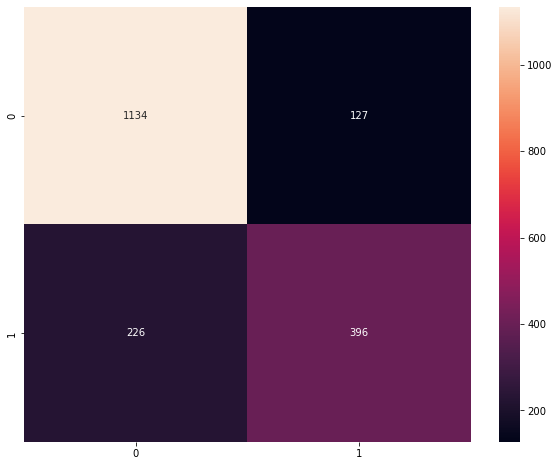

In [21]:
predictions = clf.predict(X_val)

print("Classification Report")
print(classification_report(y_val, predictions))

print("Confusion Matrix:")
con = confusion_matrix(y_val, predictions)
plt.figure(figsize=(10,8))
sns.heatmap(con, annot=True, fmt='d')

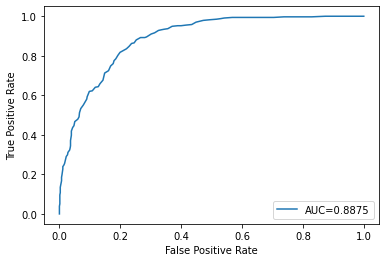

In [22]:
#define metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr0, tpr0, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc0 = round(metrics.roc_auc_score(y_test, y_pred_proba),4)

#create ROC curve
plt.plot(fpr0,tpr0,label="AUC="+str(auc0))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## XGBoost

## Confidence Intervals > .2

In [27]:
xgb_clf = XGBClassifier(learning_rate=.25)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [28]:
score = xgb_clf.score(X_val, y_val)
print(score)

0.8125331917153479


## Tuning for Learning Rates

In [29]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    xgb = XGBClassifier(learning_rate=learning_rate)
    xgb.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(xgb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(xgb.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.875
Accuracy score (validation): 0.815
Learning rate:  0.075
Accuracy score (training): 0.892
Accuracy score (validation): 0.818
Learning rate:  0.1
Accuracy score (training): 0.905
Accuracy score (validation): 0.817
Learning rate:  0.25
Accuracy score (training): 0.970
Accuracy score (validation): 0.813
Learning rate:  0.5
Accuracy score (training): 0.998
Accuracy score (validation): 0.802
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.793
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.787


Classification Report
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1261
           1       0.74      0.69      0.71       622

    accuracy                           0.82      1883
   macro avg       0.79      0.79      0.79      1883
weighted avg       0.81      0.82      0.82      1883

Confusion Matrix:


<AxesSubplot:>

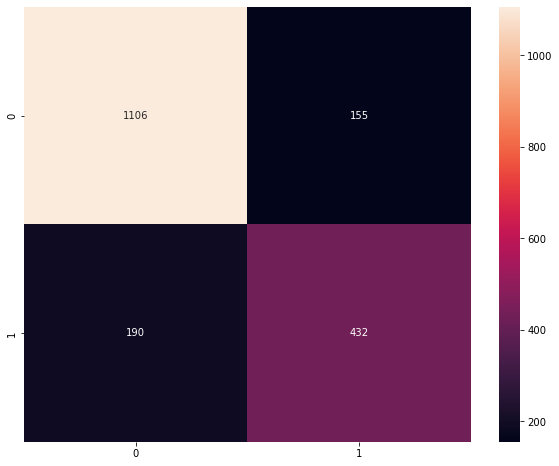

In [30]:
xgb = XGBClassifier(learning_rate=0.1)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_val)

print("Classification Report")
print(classification_report(y_val, predictions))

print("Confusion Matrix:")
con = confusion_matrix(y_val, predictions)
plt.figure(figsize=(10,8))
sns.heatmap(con, annot=True, fmt='d')

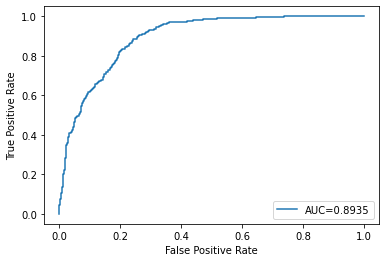

In [31]:
#define metrics
y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc1 = round(metrics.roc_auc_score(y_test, y_pred_proba),4)

#create ROC curve
plt.plot(fpr1,tpr1,label="AUC="+str(auc1))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Confidence Intervals .2 - .5

In [32]:
xgb_clf = XGBClassifier(learning_rate=.25)
xgb_clf.fit(X_train1, y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [33]:
score = xgb_clf.score(X_val1, y_val1)
print(score)

0.9801488833746899


## Tuning for Learning Rates

In [34]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    xgb = XGBClassifier(learning_rate=learning_rate)
    xgb.fit(X_train1, y_train1)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(xgb.score(X_train1, y_train1)))
    print("Accuracy score (validation): {0:.3f}".format(xgb.score(X_val1, y_val1)))

Learning rate:  0.05
Accuracy score (training): 0.992
Accuracy score (validation): 0.981
Learning rate:  0.075
Accuracy score (training): 0.994
Accuracy score (validation): 0.981
Learning rate:  0.1
Accuracy score (training): 0.999
Accuracy score (validation): 0.983
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.980
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.981
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.983
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.983


Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       793
           1       0.33      0.08      0.12        13

    accuracy                           0.98       806
   macro avg       0.66      0.54      0.56       806
weighted avg       0.97      0.98      0.98       806

Confusion Matrix:


<AxesSubplot:>

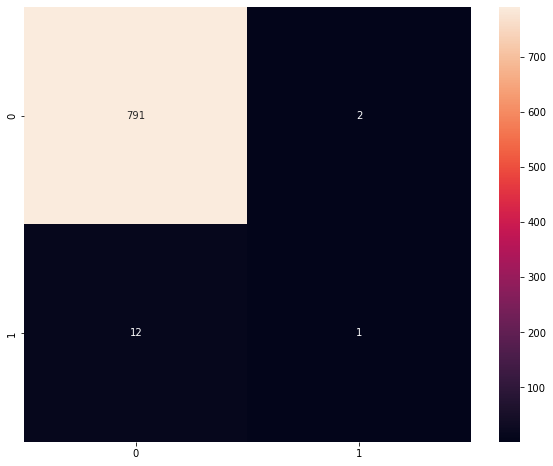

In [35]:
xgb = XGBClassifier(learning_rate=0.1)
xgb.fit(X_train1, y_train1)
predictions = xgb.predict(X_val1)

print("Classification Report")
print(classification_report(y_val1, predictions))

print("Confusion Matrix:")
con = confusion_matrix(y_val1, predictions)
plt.figure(figsize=(10,8))
sns.heatmap(con, annot=True, fmt='d')

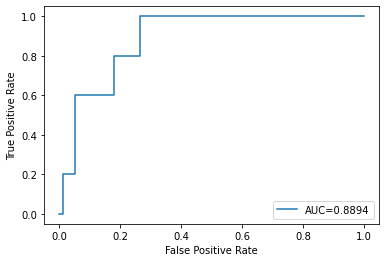

In [36]:
#define metrics
y_pred_proba = xgb.predict_proba(X_test1)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test1,  y_pred_proba)
auc2 = round(metrics.roc_auc_score(y_test1, y_pred_proba),4)

#create ROC curve
plt.plot(fpr2,tpr2,label="AUC="+str(auc2))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Confidence Intervals .5 - .7

In [37]:
xgb_clf = XGBClassifier(learning_rate=.25)
xgb_clf.fit(X_train2, y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [38]:
score = xgb_clf.score(X_val2, y_val2)
print(score)

0.875


## Tuning for Learning Rates

In [39]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    xgb = XGBClassifier(learning_rate=learning_rate)
    xgb.fit(X_train2, y_train2)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(xgb.score(X_train2, y_train2)))
    print("Accuracy score (validation): {0:.3f}".format(xgb.score(X_val2, y_val2)))

Learning rate:  0.05
Accuracy score (training): 0.974
Accuracy score (validation): 0.858
Learning rate:  0.075
Accuracy score (training): 1.000
Accuracy score (validation): 0.847
Learning rate:  0.1
Accuracy score (training): 1.000
Accuracy score (validation): 0.869
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.875
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.869
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.852
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.847


Classification Report
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       154
           1       0.27      0.14      0.18        22

    accuracy                           0.85       176
   macro avg       0.58      0.54      0.55       176
weighted avg       0.81      0.85      0.82       176

Confusion Matrix:


<AxesSubplot:>

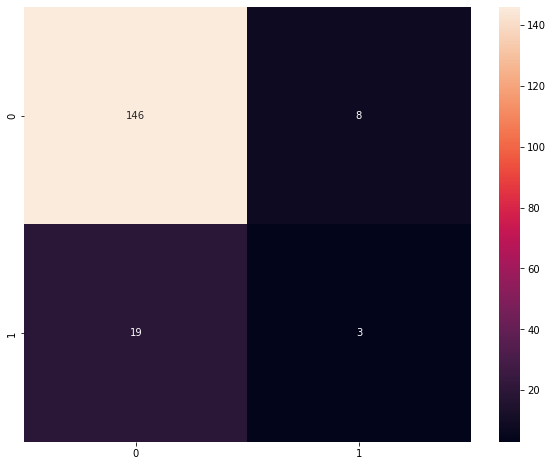

In [40]:
xgb = XGBClassifier(learning_rate=0.075)
xgb.fit(X_train2, y_train2)
predictions = xgb.predict(X_val2)

print("Classification Report")
print(classification_report(y_val2, predictions))

print("Confusion Matrix:")
con = confusion_matrix(y_val2, predictions)
plt.figure(figsize=(10,8))
sns.heatmap(con, annot=True, fmt='d')

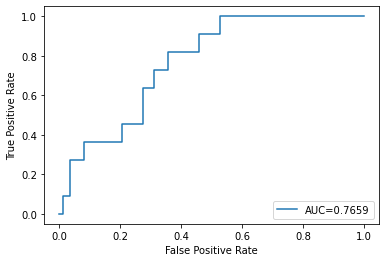

In [41]:
#define metrics
y_pred_proba = xgb.predict_proba(X_test2)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test2,  y_pred_proba)
auc3 = round(metrics.roc_auc_score(y_test2, y_pred_proba),4)

#create ROC curve
plt.plot(fpr3,tpr3,label="AUC="+str(auc3))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Confidence Intervals > .7

In [42]:
xgb_clf = XGBClassifier(learning_rate=.25)
xgb_clf.fit(X_train3, y_train3)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [43]:
score = xgb_clf.score(X_val3, y_val3)
print(score)

0.6529933481152993


In [44]:
lr_list = [0.01, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    xgb = XGBClassifier(learning_rate=learning_rate)
    xgb.fit(X_train3, y_train3)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(xgb.score(X_train3, y_train3)))
    print("Accuracy score (validation): {0:.3f}".format(xgb.score(X_val3, y_val3)))

Learning rate:  0.01
Accuracy score (training): 0.816
Accuracy score (validation): 0.669
Learning rate:  0.05
Accuracy score (training): 0.877
Accuracy score (validation): 0.681
Learning rate:  0.075
Accuracy score (training): 0.892
Accuracy score (validation): 0.671
Learning rate:  0.1
Accuracy score (training): 0.917
Accuracy score (validation): 0.675
Learning rate:  0.25
Accuracy score (training): 0.989
Accuracy score (validation): 0.653
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.664
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.639
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.654


Classification Report
              precision    recall  f1-score   support

           0       0.62      0.34      0.44       334
           1       0.69      0.88      0.78       568

    accuracy                           0.68       902
   macro avg       0.66      0.61      0.61       902
weighted avg       0.67      0.68      0.65       902

Confusion Matrix:


<AxesSubplot:>

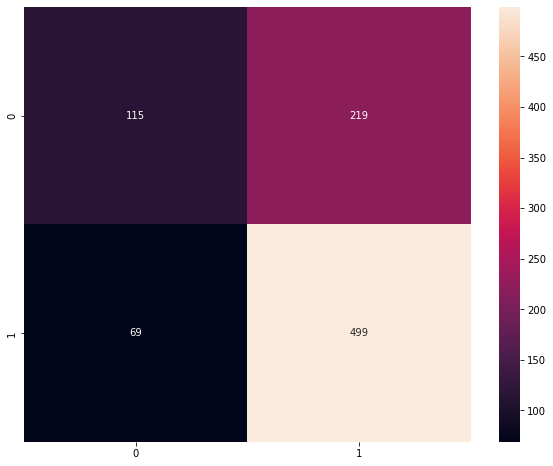

In [45]:
xgb = XGBClassifier(learning_rate=0.05)
xgb.fit(X_train3, y_train3)
predictions = xgb.predict(X_val3)

print("Classification Report")
print(classification_report(y_val3, predictions))

print("Confusion Matrix:")
con = confusion_matrix(y_val3, predictions)
plt.figure(figsize=(10,8))
sns.heatmap(con, annot=True, fmt='d')

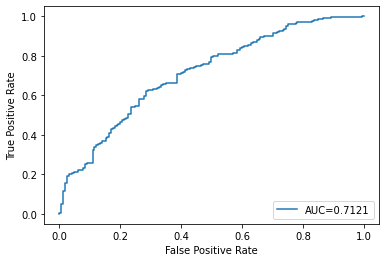

In [46]:
#define metrics
y_pred_proba = xgb.predict_proba(X_test3)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test3,  y_pred_proba)
auc4 = round(metrics.roc_auc_score(y_test3, y_pred_proba),4)

#create ROC curve
plt.plot(fpr4,tpr4,label="AUC="+str(auc4))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Combined ROC for all results

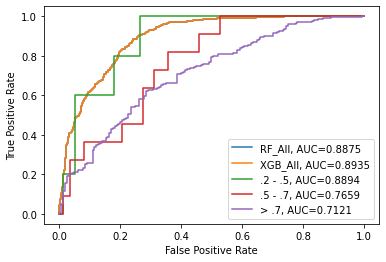

In [47]:
# Combined ROC
plt.plot(fpr1,tpr1,label="RF_All, AUC="+str(auc0))
plt.plot(fpr1,tpr1,label="XGB_All, AUC="+str(auc1))
plt.plot(fpr2,tpr2,label=".2 - .5, AUC="+str(auc2))
plt.plot(fpr3,tpr3,label=".5 - .7, AUC="+str(auc3))
plt.plot(fpr4,tpr4,label="> .7, AUC="+str(auc4))


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()